In [1]:
%load_ext autoreload
%autoreload 2

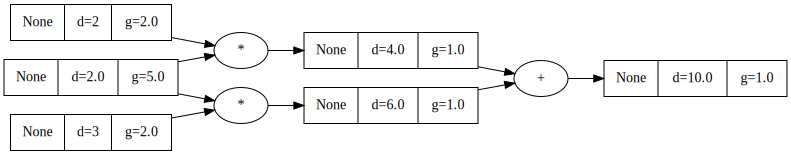

In [2]:
from graph import draw
from value import Value

a = Value(2.0)
b = a * 2
c = a * 3
d = b + c
d.backward()
d.backward()
# d(a) = 2a + 3a
# dd/da = 2 + 3 = 5
draw(d)

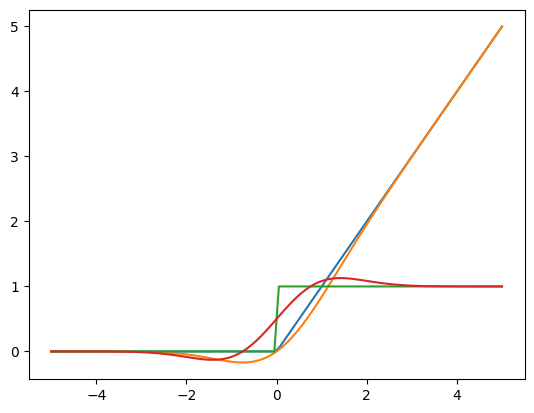

In [1]:
from matplotlib.pyplot import plot
import numpy as np
from value import Value

xs = np.linspace(-5, 5, 100)
relus = [Value(x).relu().data for x in xs]
gelus = [Value(x).gelu().data for x in xs]

plot(xs, relus)
plot(xs, gelus)

relu_grads = []
for x in xs:
    v = Value(x)
    v.relu().backward()
    relu_grads.append(v.grad)
plot(xs, relu_grads)

gelu_grads = []
for x in xs:
    v = Value(x)
    v.gelu().backward()
    gelu_grads.append(v.grad)
plot(xs, gelu_grads)

In [2]:
from net import MLP
from graph import draw
from value import Value

print('ello')
mlp = MLP(1, [2, 1])
x = [Value(2.0, label='in')]
out = mlp(x)
out.backward()
#xs = [ [1.0], [0.0] ]
print(out)
draw(out[0])

ello


AttributeError: 'list' object has no attribute 'backward'

00: 4.35 [-0.044873032942847384, -0.3326495748530971, -0.017979526391747762, 0.14500300563368193]
01: 3.23 [-0.006296341460590618, -0.37633220886727153, 0.015902607087288592, 0.17743223247208875]
02: 3.11 [0.014005421820206573, -0.43110069849718596, 0.03231080525491045, 0.2060086998002062]
03: 2.99 [0.02696051109387973, -0.4879607303807625, 0.030324622129886, 0.22716890259719538]
04: 2.87 [-0.16882727020301613, -0.7228638577912125, -0.2138100747705798, 0.14759464989476126]
05: 2.79 [0.11956660419236735, -0.5821473178773099, 0.05141962600852294, 0.313519875121806]
06: 2.53 [0.07803776723973474, -0.6884008221736093, -0.005450373190192551, 0.32664345354284774]
07: 2.39 [0.11224770814241736, -0.7334859239173331, 0.011418778112778069, 0.38023631900328186]
08: 2.27 [0.1223247656657462, -0.7916923299433356, 0.004760453263537717, 0.4054977000609315]
09: 2.18 [0.07604145193794429, -0.8996184062271969, -0.05810454810778247, 0.41439200007962707]
10: 2.09 [0.19260680463640456, -0.856212328222458, 

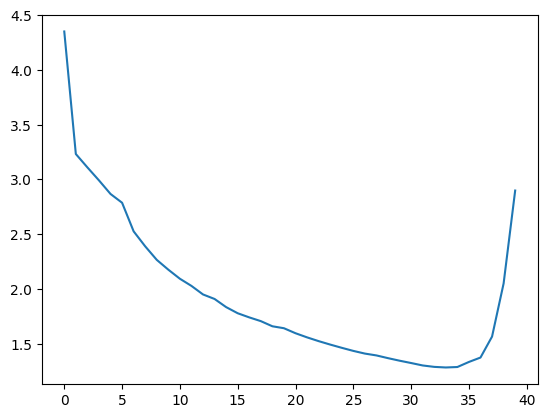

In [6]:
from graph import draw
from net import MLP
from matplotlib.pyplot import plot

# https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/micrograd/micrograd_lecture_second_half_roughly.ipynb
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]
n = MLP(3, [4, 4, 1])

# xs = [
#   [1.0]
# ]
# ys = [1.0]
# n = MLP(1, [2, 1])
losses = []
for i in range(40):
  loss = n.learn(xs, ys, 0.05)
  losses.append(loss.data)
  print(f'{i:02}: {loss.data:.2f} {[n(x)[0].data for x in xs]}')

plot(range(40), losses)

00: 0.89 [-0.019065022468566895, -0.2247166782617569, -0.11246339231729507, -0.05577744543552399]
01: 0.81 [0.04518251121044159, -0.2736119031906128, -0.12412769347429276, -0.02053476870059967]
02: 0.76 [0.10671474039554596, -0.30235177278518677, -0.1175883337855339, 0.01815621554851532]
03: 0.70 [0.1570768505334854, -0.3440812826156616, -0.118680439889431, 0.05259750783443451]
04: 0.66 [0.22440506517887115, -0.344058096408844, -0.08194207400083542, 0.12120436131954193]
05: 0.60 [0.25344884395599365, -0.4525665044784546, -0.12967288494110107, 0.12022918462753296]
06: 0.55 [0.32986366748809814, -0.47149431705474854, -0.10048224031925201, 0.19496628642082214]
07: 0.49 [0.34385645389556885, -0.5951369404792786, -0.15651896595954895, 0.1878865510225296]
08: 0.44 [0.4480607807636261, -0.6136915683746338, -0.12509474158287048, 0.2758082449436188]
09: 0.39 [0.45560479164123535, -0.7441956996917725, -0.18798823654651642, 0.26725494861602783]
10: 0.34 [0.570509672164917, -0.7574318647384644, -0

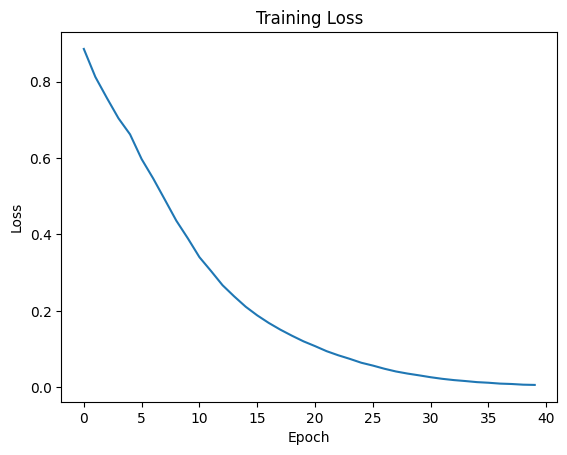

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the MLP class
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        layers = []
        sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(sizes) - 1):
            layers.append(nn.Linear(sizes[i], sizes[i + 1]))
            if i < len(sizes) - 2:  # Add activation for hidden layers
                layers.append(nn.ReLU())
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Inputs and targets
xs = torch.tensor([
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
], dtype=torch.float32)

ys = torch.tensor([1.0, -1.0, -1.0, 1.0], dtype=torch.float32).view(-1, 1)

# Initialize the model
n = MLP(3, [4, 4], 1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(n.parameters(), lr=0.05)

# Training loop
losses = []
for epoch in range(40):
    # Forward pass
    outputs = n(xs)
    loss = criterion(outputs, ys)
    losses.append(loss.item())
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    print(f'{epoch:02}: {loss.item():.2f} {[output.item() for output in outputs]}')

# Plot the loss
plt.plot(range(40), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
